#### CO543 – Image Processing    
### Lab 05

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans



2. Select several features and calculate them on blocks of size of 12 × 12 using Gabor 
filter. Display the calculated features and estimate which ones can be used to segment 
given structure. 
For the selected images apply the K-means method and comment on the results. 
3. Calculate the spectra energy (without the DC component) feature on the texture.tif 
image, on the blocks of size 12×12. Is this feature good for segmentation of the textures 
on this image? 
Segment the energy image using the K-means method and comment on the results. 
4. By using segmentation and cv2.inpaint restore the “Efac.jpg” image. In your report explain 
the steps you used to achieve it.

1. Read the image texture.tif. Display the image. How many textures are there in the 
image? Describe them. Find images here (link updated): 
https://drive.google.com/drive/folders/1fPzXha_xapiXJhEbiatJ2pWpOyYfJ53?usp=sharing 

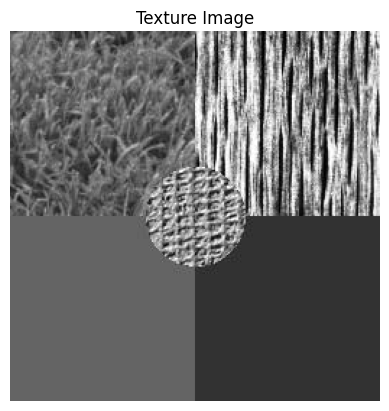

In [34]:
# Read the image
image = cv2.imread('texture.tif', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Texture Image')
plt.axis('off')
plt.show()


There are five textures in the given image,

1. grass like (wool like) texture
2. 
3. 
4. 
5. 

````

2. Select several features and calculate them on blocks of size of 12 × 12 using Gabor filter. Display the calculated features and estimate which ones can be used to segment given structure. 

For the selected images apply the K-means method and comment on the results.

In [36]:
# Function to apply Gabor filter
def apply_gabor_filter(image, ksize=12):
    gabor_features = []
    for theta in np.arange(0, np.pi, np.pi / 4):
        kernel = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        filtered_img = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        gabor_features.append(filtered_img)
    return gabor_features

In [37]:
# Apply Gabor filter
gabor_features = apply_gabor_filter(image)

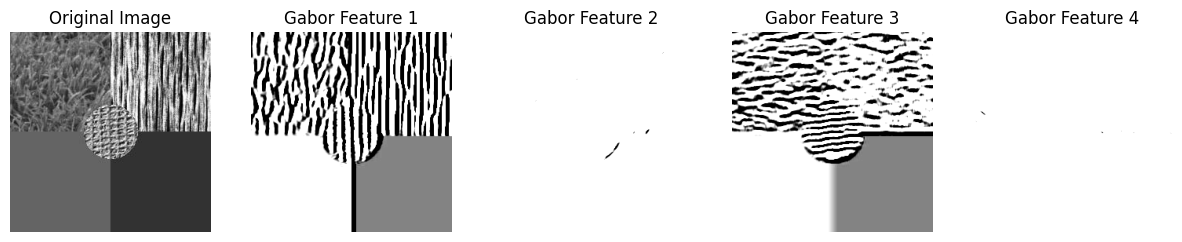

In [38]:
# Display original image and Gabor features
plt.figure(figsize=(15, 8))

# Plot original image
plt.subplot(1, len(gabor_features) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot Gabor features
for i, feature in enumerate(gabor_features):
    plt.subplot(1, len(gabor_features) + 1, i + 2)
    plt.imshow(feature, cmap='gray')
    plt.title(f'Gabor Feature {i+1}')
    plt.axis('off')

plt.show()

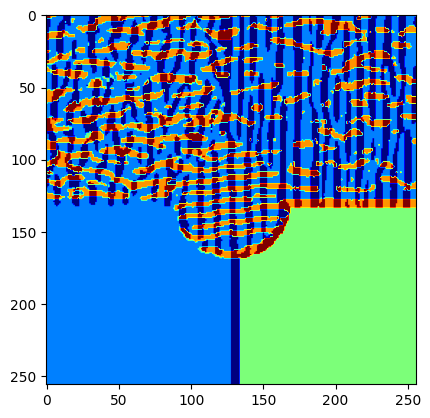

In [48]:
# Reshape the Gabor features to a 2D array
reshaped_features = [feature.reshape(-1, 1) for feature in gabor_features]
combined_features = np.hstack(reshaped_features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(combined_features)
segmented_img = kmeans.labels_.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img, cmap='gray')# Reshape the Gabor features to a 2D array
reshaped_features = [feature.reshape(-1, 1) for feature in gabor_features]
combined_features = np.hstack(reshaped_features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(combined_features)
segmented_img = kmeans.labels_.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img, cmap='gray')# Reshape the Gabor features to a 2D array
reshaped_features = [feature.reshape(-1, 1) for feature in gabor_features]
combined_features = np.hstack(reshaped_features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(combined_features)
segmented_img = kmeans.labels_.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img, cmap='jet')

In [46]:
# Apply K-means
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)
segmented_img = kmeans.labels_.reshape(image.shape)


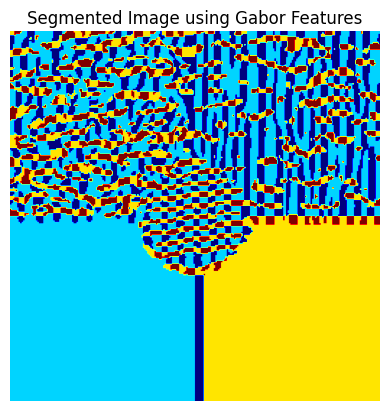

In [47]:

# Display segmented image
plt.imshow(segmented_img, cmap='jet')
plt.title('Segmented Image using Gabor Features')
plt.axis('off')
plt.show()

3. Calculate the spectra energy (without the DC component) feature on the texture.tif 
image, on the blocks of size 12×12. Is this feature good for segmentation of the textures 
on this image? 
Segment the energy image using the K-means method and comment on the results.

In [50]:

# Load the texture image
image = cv2.imread('texture.tif', cv2.IMREAD_GRAYSCALE)

In [54]:
# Define block size
block_size = 12

# Function to compute spectral energy (without DC component)
def compute_spectral_energy(image, block_size):
    h, w = image.shape
    energy_map = np.zeros((h // block_size, w // block_size))
    for i in range(0, h - block_size + 1, block_size): # Adjust loop range
        for j in range(0, w - block_size + 1, block_size): # Adjust loop range
            block = image[i:i + block_size, j:j + block_size]

            # Compute the Fourier Transform
            f_transform = np.fft.fft2(block)
            f_transform_shifted = np.fft.fftshift(f_transform)

            # Remove DC component (center pixel)
            center_x, center_y = block_size // 2, block_size // 2
            f_transform_shifted[center_x, center_y] = 0

            # Compute spectral energy (sum of squared magnitudes)
            spectral_energy = np.sum(np.abs(f_transform_shifted) ** 2)
            energy_map[i // block_size, j // block_size] = spectral_energy

    return energy_map

In [55]:
# Compute spectral energy map
spectral_energy_map = compute_spectral_energy(image, block_size)

In [56]:
# Normalize for better visualization
normalized_energy_map = (spectral_energy_map - np.min(spectral_energy_map)) / (np.max(spectral_energy_map) - np.min(spectral_energy_map)) * 255
normalized_energy_map = normalized_energy_map.astype(np.uint8)

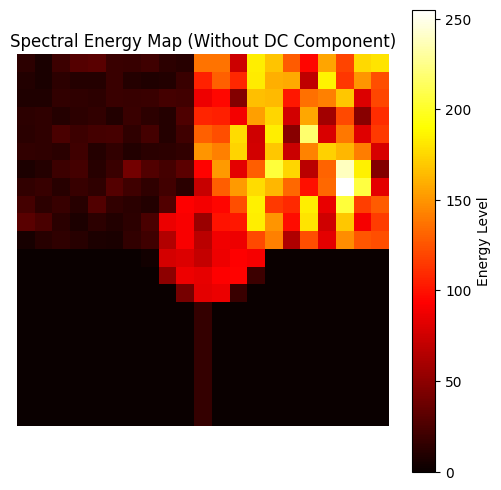

In [57]:
plt.figure(figsize=(6, 6))
plt.imshow(normalized_energy_map, cmap='hot')
plt.title("Spectral Energy Map (Without DC Component)")
plt.colorbar(label="Energy Level")
plt.axis("off")
plt.show()

If the energy map shows clear differences between textures, then spectral energy is a good feature for segmentation. However, if the textures have similar spectral energy values, it becomes less useful for distinguishing between them. Spectral energy is particularly effective when applied to textures with distinct frequency patterns, such as differentiating between rough and smooth textures, where variations in spectral components are more pronounced.

Segment the energy image using the K-means method and comment on the results.

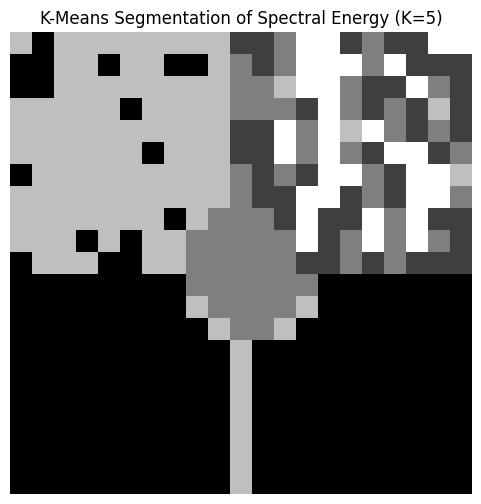

In [62]:
# Reshape energy map for K-means clustering
reshaped_energy = spectral_energy_map.reshape((-1, 1)).astype(np.float32)

# Define number of clusters (adjust based on textures)
K = 5  # Change this based on the number of expected textures

# Define K-means criteria (stop at 100 iterations or accuracy of 0.1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)

# Apply K-means
_, labels, centers = cv2.kmeans(reshaped_energy, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert clustered labels back into image shape
segmented_energy_image = labels.reshape(spectral_energy_map.shape)

# Normalize for better visualization
segmented_energy_image = (segmented_energy_image * 255 / (K - 1)).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(segmented_energy_image, cmap='gray')
plt.title(f"K-Means Segmentation of Spectral Energy (K={K})")
plt.axis("off")
plt.show()

4. By using segmentation and cv2.inpaint restore the “Efac.jpg” image. In your report explain 
the steps you used to achieve it.

In [72]:
# Load the original image
image_path = "Efac.jpg"
image = cv2.imread(image_path)


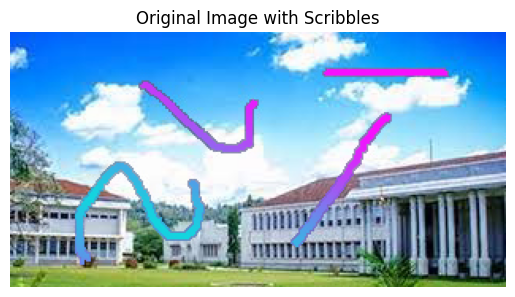

In [73]:

# Convert to RGB for displaying properly in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image with Scribbles")
plt.axis("off")
plt.show()


In [87]:
# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define multiple color ranges
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

lower_purple = np.array([130, 50, 50])
upper_purple = np.array([150, 255, 255])

lower_pink = np.array([150, 50, 50])
upper_pink = np.array([170, 255, 255])

# Create masks for each color
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_purple = cv2.inRange(hsv, lower_purple, upper_purple)
mask_pink = cv2.inRange(hsv, lower_pink, upper_pink)

# Combine masks using bitwise OR
mask = cv2.bitwise_or(mask_blue, cv2.bitwise_or(mask_purple, mask_pink))
final_mask = cv2.medianBlur(mask, 5)

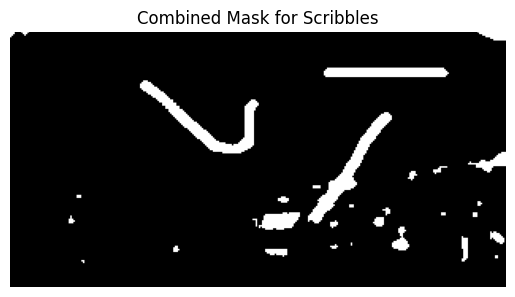

In [88]:
# Show the final mask
plt.imshow(final_mask, cmap="gray")
plt.title("Combined Mask for Scribbles")
plt.axis("off")
plt.show()

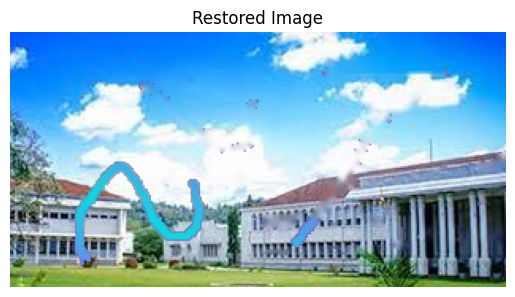

In [ ]:
# Apply inpainting
restored_image = cv2.inpaint(image, final_mask  , inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Convert to RGB for displaying
restored_image_rgb = cv2.cvtColor(restored_image, cv2.COLOR_BGR2RGB)

plt.imshow(restored_image_rgb)
plt.title("Restored Image")
plt.axis("off")
plt.show()